<img src="https://raw.githubusercontent.com/TiagoDataAnalyst/Python_Coding/main/Movie_list.PNG" alt="Movie list logo" 
style="width:400px; float: right; margin: 0 40px 40px 40px;"></img>
   
# Python project: Movies database
## Data analysis    

In [422]:
<hr style = "border: 6.0px solid navy; width:100%;"></hr>

## Import Libraries 

SyntaxError: invalid syntax (3420011396.py, line 1)

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib 
import matplotlib.pyplot as plt 
plt.style.use('seaborn-v0_8-darkgrid')
from matplotlib.pyplot import figure
from matplotlib.patches import ConnectionPatch

%matplotlib inline
plt.rcParams['figure.figsize']= (13,9)

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm



## Import & read the data source

In [391]:
data = pd.read_csv('movies.csv')
data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.40,927000.00,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.00,46998772.00,Warner Bros.,146.00
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.80,65000.00,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.00,58853106.00,Columbia Pictures,104.00
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.70,1200000.00,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.00,538375067.00,Lucasfilm,124.00
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.70,221000.00,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.00,83453539.00,Paramount Pictures,88.00
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.30,108000.00,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.00,39846344.00,Orion Pictures,98.00


<hr style = "border: 6.0px solid navy; width:100%;"></hr>

## Data Cleaning
### Checking for missing data - Number/percentage of cells missing data



In [392]:
for entry in data.columns:
    num_missing = np.sum(data[entry].isnull()).round(4)
    pct_missing = np.mean(data[entry].isnull()).round(4)
    print('{} - {} / {}%'.format(entry, num_missing, pct_missing))

name - 0 / 0.0%
rating - 77 / 0.01%
genre - 0 / 0.0%
year - 0 / 0.0%
released - 2 / 0.0003%
score - 3 / 0.0004%
votes - 3 / 0.0004%
director - 0 / 0.0%
writer - 3 / 0.0004%
star - 1 / 0.0001%
country - 3 / 0.0004%
budget - 2171 / 0.2831%
gross - 189 / 0.0246%
company - 17 / 0.0022%
runtime - 4 / 0.0005%


<hr style="border: 6.0px solid black; width:100%;"></hr>

### What's the data type in each data frame columns?

In [393]:
data.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

### Change "budget" and "gross columns columns data type from float to int

In [394]:
df['budget'] = pd.to_numeric(data['budget'], errors='coerce').fillna(0).astype('int64')
df['gross'] = pd.to_numeric(data['gross'], errors = 'coerce'). fillna(0).astype('int64')

### From a quick review of columns "Year" and "Released", it seems there is mismatch. Confirmation test was done

In [395]:
data['released'].equals(data['year'])

False

### Create new column "Year_corrected" from column "released"

In [396]:
data['Year_corrected'] = data['released'].str.extract(pat = '([0-9]{4})').fillna(0).astype(int)

### As column "year" had mismatching data, this was excluded from main table

In [397]:
data = data.drop(columns = 'year')

<hr style = "border: 6.0px solid navy; width:100%;"></hr>

## Data Analysis

### Who are the companies producing the movies?

In [398]:
companies_dist = data['company'].drop_duplicates().sort_values(ascending=False)
companies_dist

7129                                thefyzz
5664                            micro_scope
6412               iDeal Partners Film Fund
4007                               i5 Films
6793                             i am OTHER
                       ...                 
3748                     1+2 Seisaku Iinkai
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
408                                     NaN
Name: company, Length: 2386, dtype: object

### Is there a correlation between movie budget and gross revenue? (analysis with scatter plot)

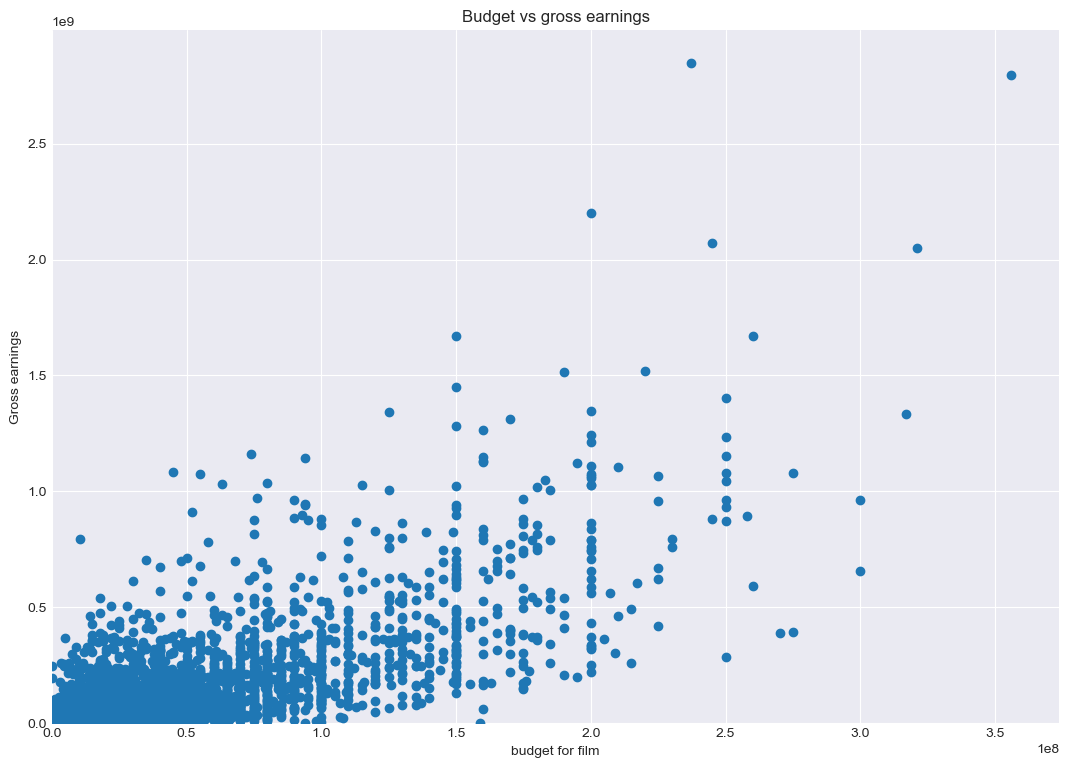

In [399]:
corr_plot = plt.scatter(x = data['budget'], y = data['gross'])
plt.title('Budget vs gross earnings')
plt.ylabel('Gross earnings')
plt.xlabel('budget for film')
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()


### As the correlation is not clear, a linear regression model fit was performed (using seaborn)

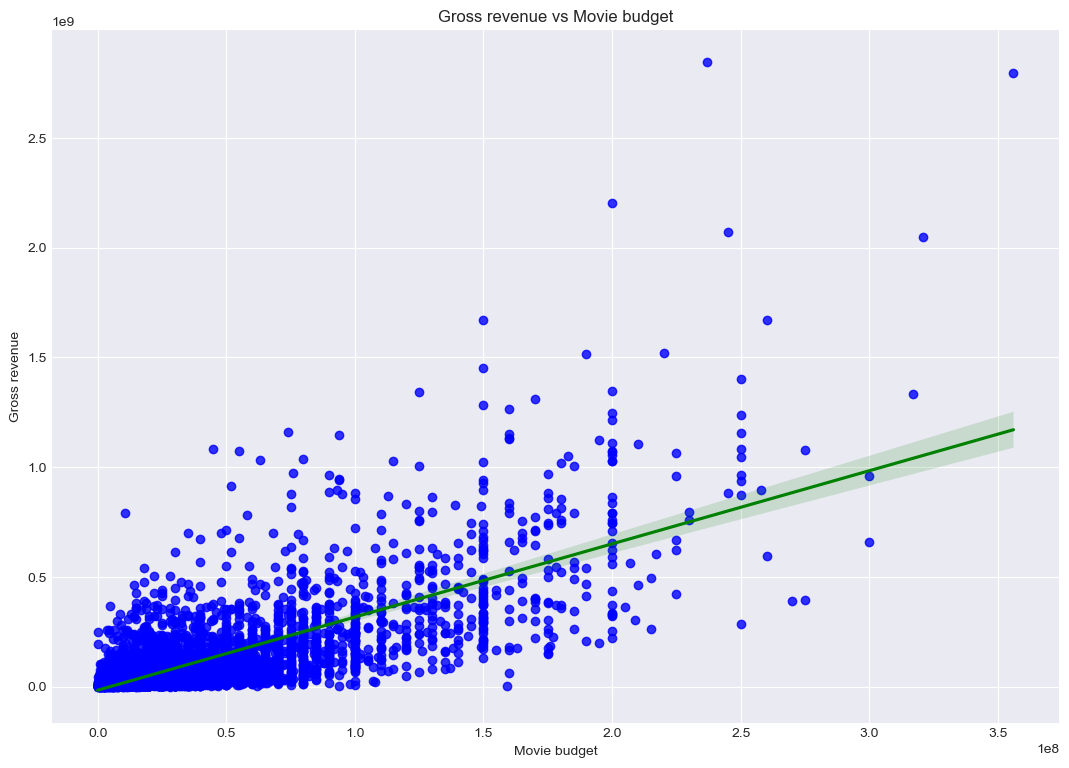

In [400]:
seab = sns.regplot(x = data['budget'], y = data['gross'], data=data, scatter_kws={"color": "blue"}, line_kws={"color": "green"})
seab.set(xlabel = "Movie budget",ylabel = "Gross revenue",title = "Gross revenue vs Movie budget")
plt.show()

### Testing for correlation between other columns

In [401]:
correlation_matrix = data.corr(numeric_only=True, method = 'pearson')
correlation_matrix

,score,votes,budget,gross,runtime,Year_corrected
score,1.00,0.41,0.08,0.19,0.40,0.05
votes,0.41,1.00,0.44,0.63,0.31,0.07
budget,0.08,0.44,1.00,0.74,0.32,0.32
gross,0.19,0.63,0.74,1.00,0.25,0.25
runtime,0.40,0.31,0.32,0.25,1.00,0.12
Year_corrected,0.05,0.07,0.32,0.25,0.12,1.00


### For easily identify high correlations, a heatmap is used as a visual aid 

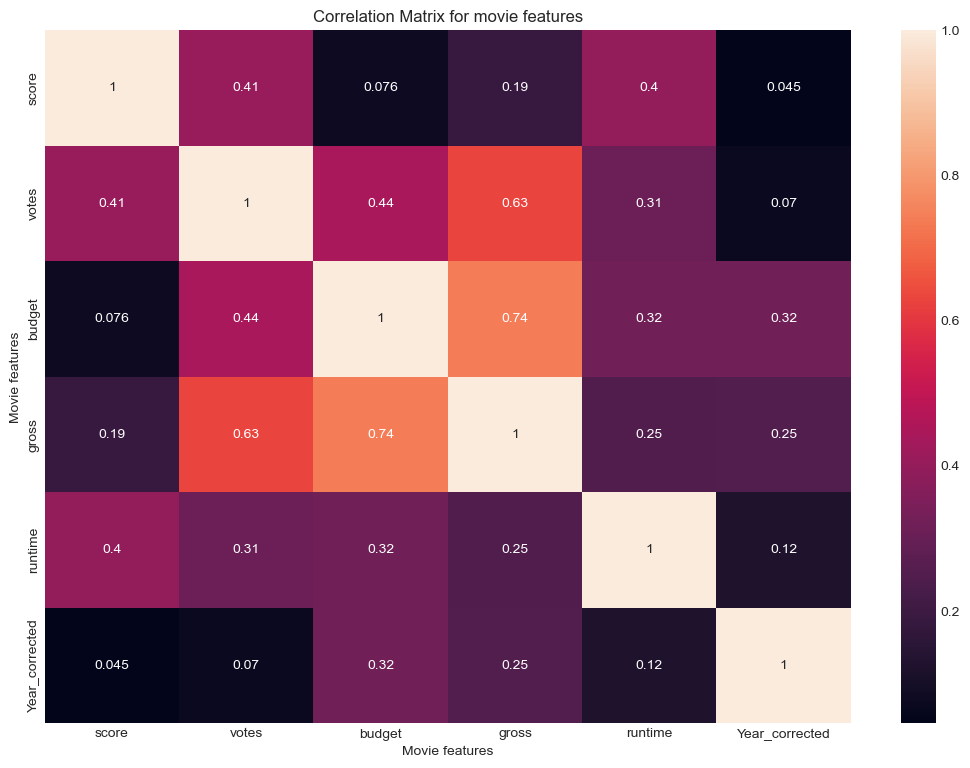

In [402]:
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for movie features')
plt.ylabel('Movie features')
plt.xlabel('Movie features')
plt.show()

### An alternative to the heatmap to check for high correlations

In [403]:
data_correlation = correlation_matrix.unstack()
higher_corr = data_correlation[(data_correlation > 0.5) & (data_correlation < 1)].sort_values(ascending=False)
higher_corr

budget  gross    0.74
gross   budget   0.74
votes   gross    0.63
gross   votes    0.63
dtype: float64

### Conclusion: the highest correlation are "votes" and "gross" and "budget" and "gross" 

<hr style = "border: 6.0px solid navy; width:100%;"></hr>

## Data Insights 

### What's the movie gender that has been generated the most gross revenue?

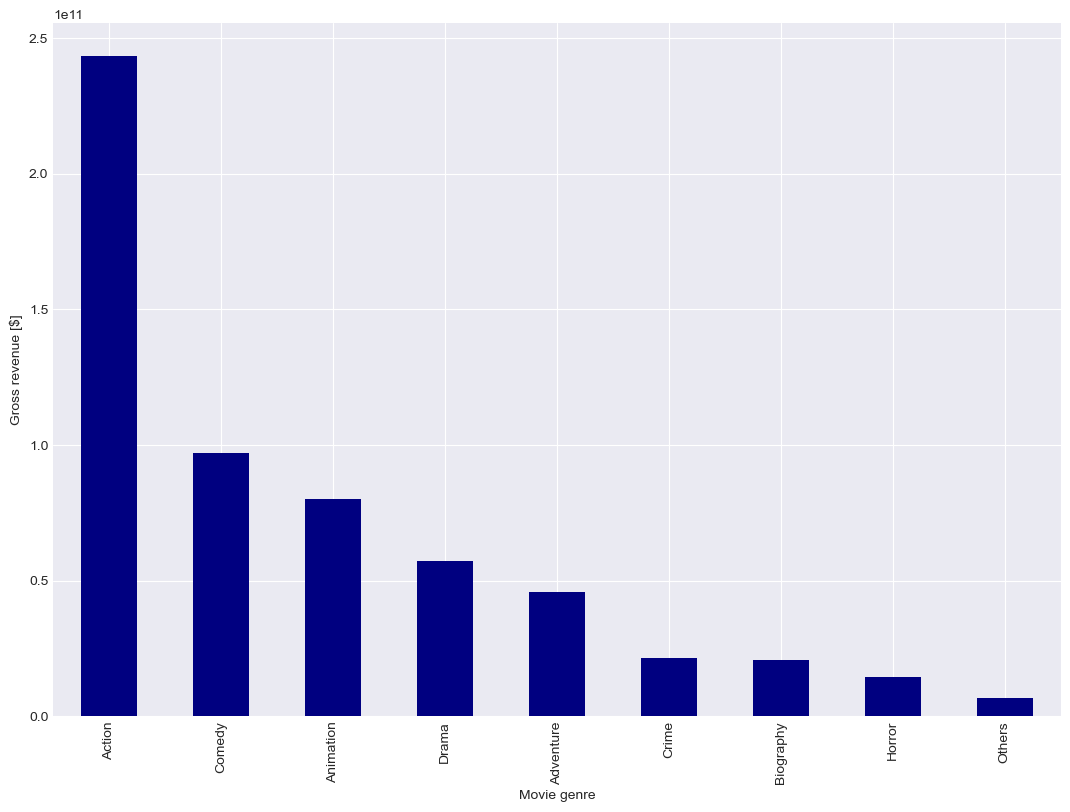

In [404]:
data['genre_chart'] = data['genre'].replace({'Family':'Others',
                                            'Mystery':'Others',
                                            'Fantasy':'Others',
                                            'Thriller':'Others',
                                            'Sci-Fi':'Others',
                                            'Romance':'Others',
                                            'Western':'Others',      
                                            'Musical':'Others',
                                            'Sport':'Others',
                                            'Music':'Others',    
                                            'History':'Others',
                                            })    

genre_gross_chart = data[['genre_chart','gross']].groupby('genre_chart', as_index = True).sum().astype('float').sort_values(by='gross', ascending = False)

graph = genre_gross.sort_values(by='gross', ascending=False).plot(kind = 'bar', color = 'navy', legend = False)

graph.set_xlabel('Movie genre')
graph.set_ylabel('Gross revenue [$]')

plt.show()

### Gross revenue per movie gender [Percentage %]

In [405]:
genre_chart_others = data[['genre','gross']].loc[data['genre_chart']=='Others'].groupby('genre', as_index=True).sum()

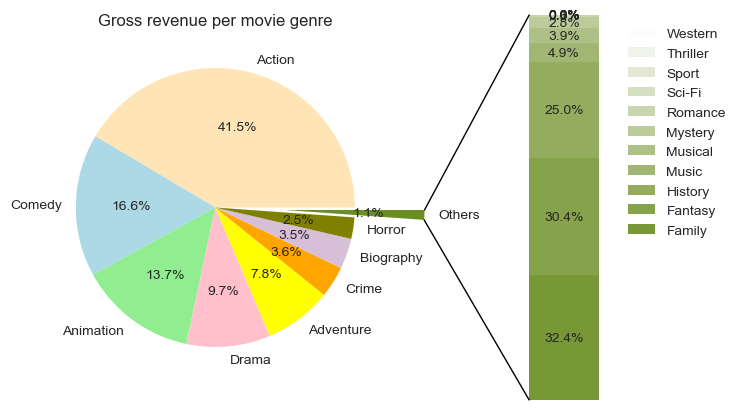

In [406]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(9,5))
fig.subplots_adjust(wspace=0)

#pie chart parameters
gross_pie= genre_gross_piechart['gross']
labels_pie = genre_gross_piechart.index
explode = [0,0,0,0,0,0,0,0,0.5]


#rotate so that first wedge is split by the x-axis
angle = 0
wedges, *_ = ax1.pie(gross_pie, 
                     autopct = '%1.1f%%', 
                     startangle = angle,
                     labels = labels_pie,
                     explode = explode,
                     colors = ['moccasin',
                               'lightblue',
                               'lightgreen',
                               'pink',
                               'yellow',
                               'orange',
                               'thistle',
                               'olive',
                               'olivedrab'
                              ])

# bar chart parameters
gross_bar = genre_chart_others['gross'].apply(lambda x: (x/genre_Others_gross['gross'].sum())).sort_values(ascending = False)
labels_bar = genre_Others_gross.index
bottom = 1
width = .2

#Adding from the top matches the legend
for j, (height, label) in enumerate(reversed([*zip(gross_bar, labels_bar)])):
    bottom -= height
    bc = ax2.bar(0,height, width, bottom = bottom, color='olivedrab', label=label,
                alpha =  .01 + .09 * j)
    ax2.bar_label(bc, labels = [f"{height:.01%}"], label_type = 'center')
                                
ax1.set_title('Gross revenue per movie genre')
ax2.legend()
ax2.axis('off')
ax2.set_xlim( - 2.5 * width, 2.5 * width)                                

#Using Connectionpatch to draw lines between the two plots
theta1, theta2 = wedges[8].theta1, wedges[8].theta2
center, r = wedges[8].center, wedges[8].r
bar_height = sum(gross_bar)

#draw top connecting line
x = r*np.cos(np.pi/180 * theta2) + center [0]
y = r*np.sin(np.pi/180 * theta2) + center [1]
con = ConnectionPatch (xyA=(-width/2,bar_height), 
                       coordsA=ax2.transData,
                       xyB=(x,y), 
                       coordsB=ax1.transData)
con.set_color([0,0,0])
con.set_linewidth(1)
ax2.add_artist(con)

#draw bottom connecting line
x = r*np.cos(np.pi/180 *theta1) + center[0]
y = r*np.sin(np.pi/180 * theta1) + center[1]
con = ConnectionPatch(xyA = (-width /2,0),
                      coordsA=ax2.transData,
                      xyB = (x,y), 
                      coordsB=ax1.transData)
con.set_color([0,0,0])
ax2.add_artist(con)
con.set_linewidth(1)

plt.show()

### Number of movies produced, total gross revenue and average gross revenue per movie per country


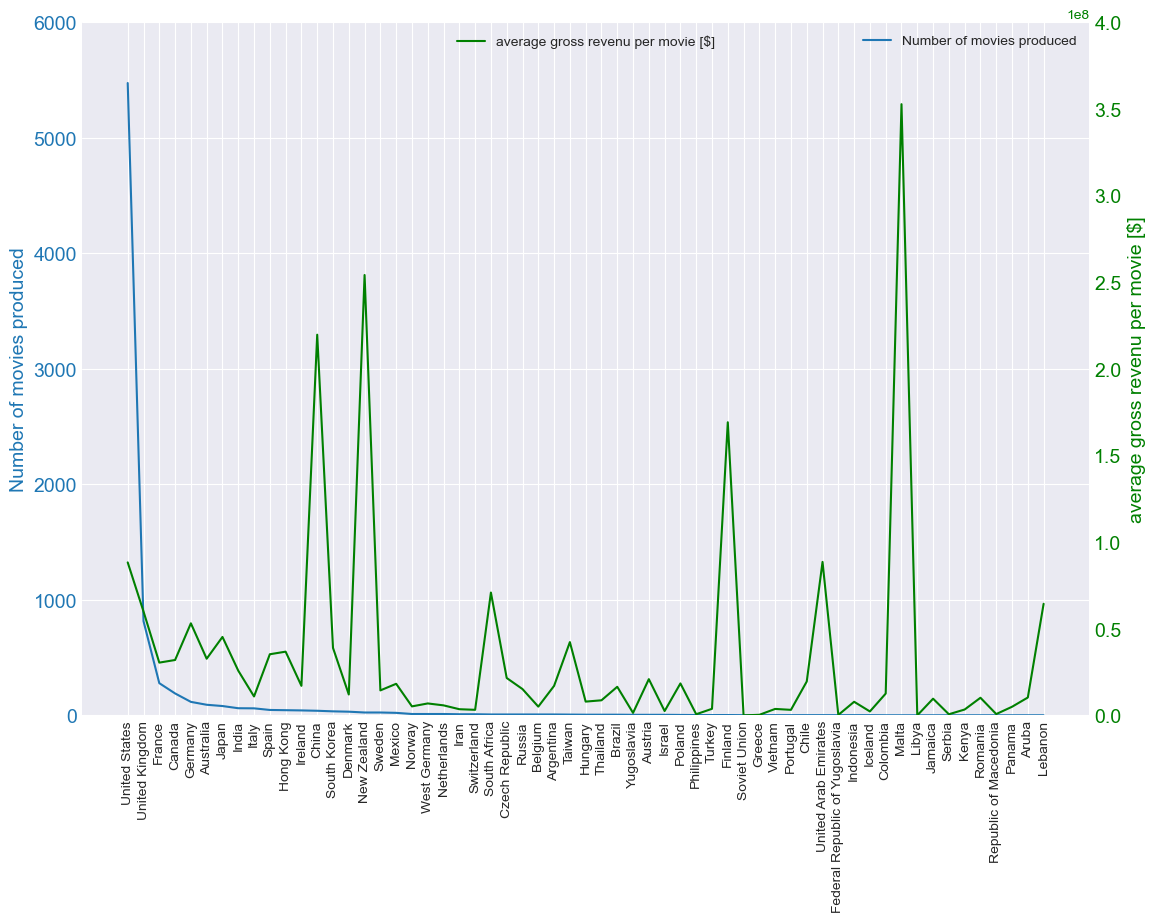

In [407]:
MoviesKPIs_country = data.groupby('country',as_index=True).agg({'name':'count','gross':'sum'}).sort_values(by = 'name', ascending = False)
MoviesKPIs_country = MoviesKPIs_country.rename(columns = {'name':'Number of movies produced','gross':'Total gross revenue'})
MoviesKPIs_country['average gross per movie'] = MoviesKPIs_country['Total gross revenue']/MoviesKPIs_country['Number of movies produced']

countries = MoviesKPIs_country.index

#Create figure and axis #1
fig, ax1 = plt.subplots()

#plot line chart on axis #1
p1, = ax1.plot(countries, MoviesKPIs_country['Number of movies produced'])
ax1.set_ylabel('Number of movies produced')
ax1.set_ylim(0,6000)
ax1.legend(['Number of movies produced'], loc = "upper right")
ax1.yaxis.label.set_color(p1.get_color())
ax1.yaxis.label.set_fontsize(14)
ax1.tick_params(axis = 'y', colors = p1.get_color(), labelsize = 14)

plt.xticks(rotation=90)

# set up the 2nd axis 
ax2 = ax1.twinx()

#plot bar chart on axis #2
p2, = ax2.plot(countries, MoviesKPIs_country['average gross per movie'], color = 'green')
ax2.grid(False) #turn off grid #2
ax2.set_ylabel('average gross revenu per movie [$]')
ax2.set_ylim(0,4e+08)
ax2.legend(['average gross revenu per movie [$]'], loc = "upper center")
ax2.yaxis.label.set_color(p2.get_color())
ax2.yaxis.label.set_fontsize(14)
ax2.tick_params(axis = 'y', colors = p2.get_color(), labelsize = 14)

In [408]:
#### By far, the United States produces most of the movies but has a lower gross revenue average per movie, compared with other countries

### Top 10 movies with highest net revenue (gross revenue minus budget)

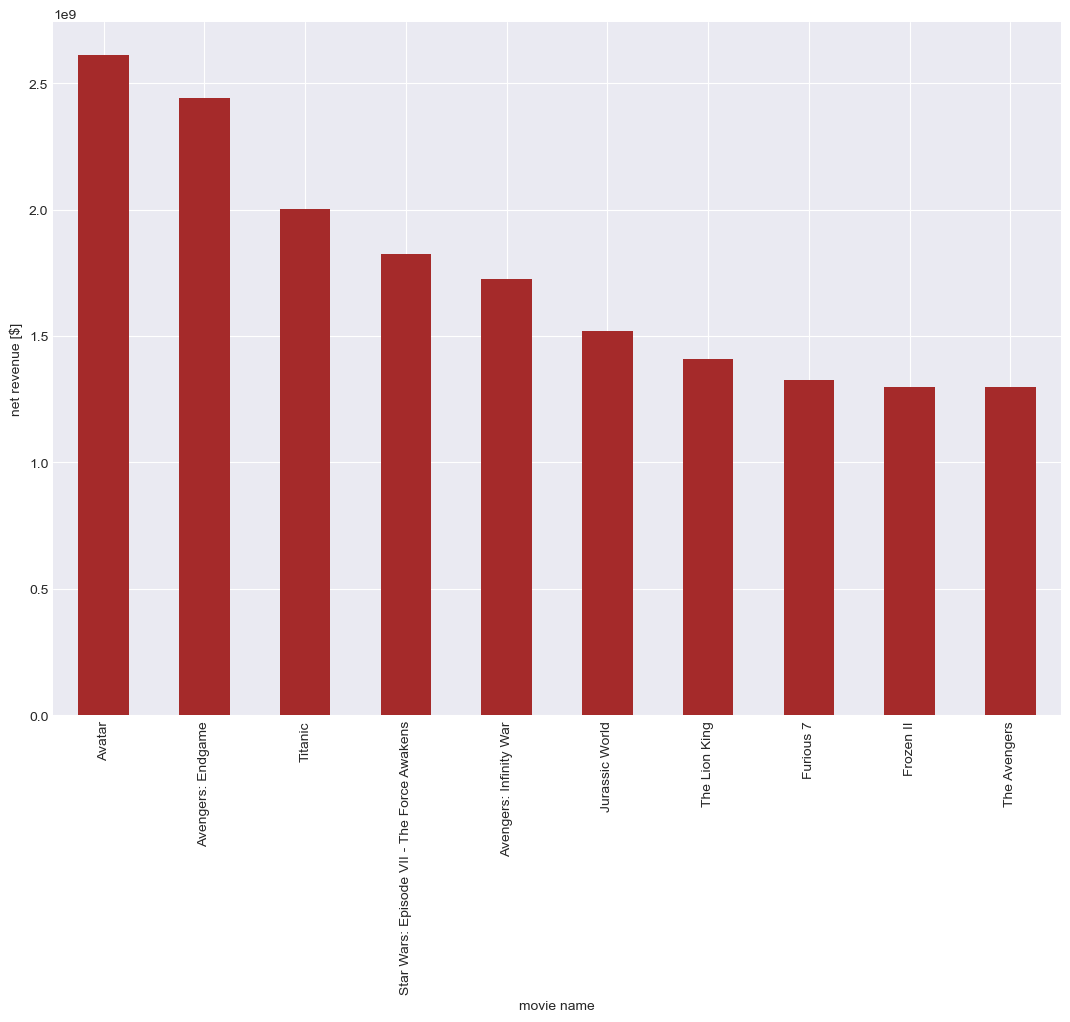

In [411]:
data['net_revenue'] = data['gross'] - data['budget']
top_ten = data[['name','net_revenue']].sort_values(by = 'net_revenue', ascending = False).head(10)
chart = top_ten.plot('name',kind = 'bar',legend = False, color = 'brown')
chart.set_xlabel('movie name')
chart.set_ylabel('net revenue [$]')

plt.xticks(rotation=90)
plt.show()

### Does some companies tend to produce higher gross revenue than others? 

#### For this statistical test, a ANOVA test will be used

* null hypothesis: companies produce the same average gross revenue
* alternative hypothesis: companies produce different average gross revenue


In [389]:
model = ols('gross ~ company',data = data).fit()
anova_results = anova_lm(model)
print(anova_results)

              df                   sum_sq              mean_sq    F  PR(>F)
company  2384.00  75942755161865977856.00 31855182534339756.00 1.29    0.00
Residual 5266.00 130481482891933155328.00 24778101574617008.00  NaN     NaN


### Conclusion: the p-value (PR(>F) obtained from ANOVA analysis is significant (p < 0.05), and therefore, the null hypothesis is  rejected and alternative hypothesis is accepted. In this way, we can say the companies have different average gross revenue